In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

ratings = pd.read_csv('../data/cleaned_data/ratings_clean.csv')
tags = pd.read_csv('../data/cleaned_data/tags_clean.csv')

ratings["year"] = pd.to_datetime(ratings["timestamp"], unit='s').dt.year
tags["year"] = pd.to_datetime(tags["timestamp"], unit='s').dt.year

In [11]:
ratings_per_year = (
    ratings
    .groupby("year")
    .size()
    .reset_index(name="num_ratings")
)

tags_per_year = (
    tags
    .groupby("year")
    .size()
    .reset_index(name="num_tags")
)


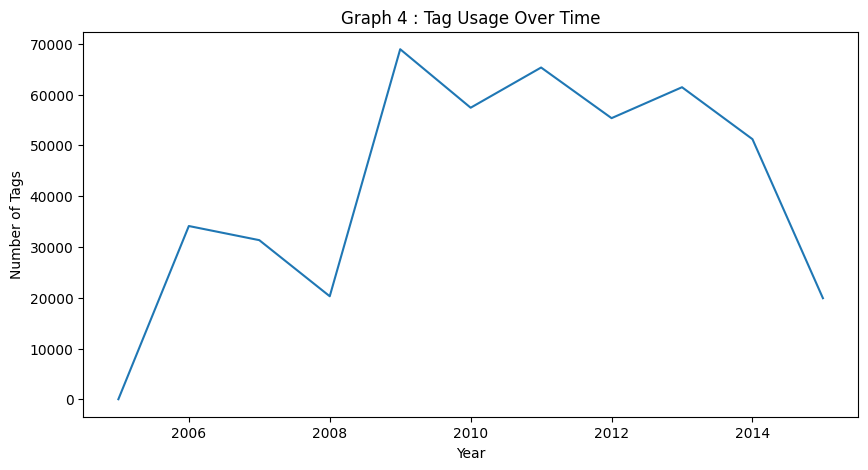

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(tags_per_year["year"], tags_per_year["num_tags"])
plt.xlabel("Year")
plt.ylabel("Number of Tags")
plt.title("Graph 4 : Tag Usage Over Time")
plt.show()


In [ ]:
#TAG VS RATING NORMALIZATION
ratings_norm = ratings_per_year.copy()
ratings_norm["normalized"] = (
    ratings_norm["num_ratings"] / ratings_norm["num_ratings"].max()
)

tags_norm = tags_per_year.copy()
tags_norm["normalized"] = (
    tags_norm["num_tags"] / tags_norm["num_tags"].max()
)

ratings_peak_idx = ratings_norm['num_ratings'].idxmax()
ratings_peak_year = int(ratings_norm.loc[ratings_peak_idx, 'year'])
ratings_peak_count = int(ratings_norm.loc[ratings_peak_idx, 'num_ratings'])

tags_peak_idx = tags_norm['num_tags'].idxmax()
tags_peak_year = int(tags_norm.loc[tags_peak_idx, 'year'])
tags_peak_count = int(tags_norm.loc[tags_peak_idx, 'num_tags'])


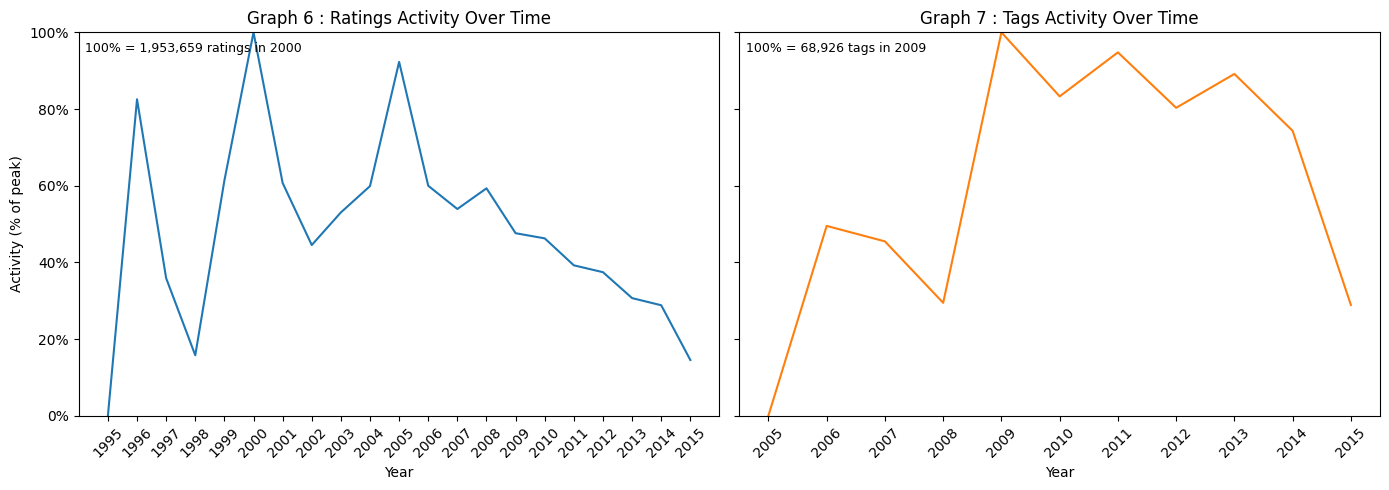

In [32]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

axes[0].plot(ratings_norm['year'], ratings_norm['normalized'], color='C0')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Activity (% of peak)')
axes[0].set_title('Graph 6 : Ratings Activity Over Time')
axes[0].set_xticks(ratings_norm['year'].unique())
axes[0].tick_params(axis='x', rotation=45)
axes[0].set_ylim(0, 1)
axes[0].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
axes[0].text(0.01, 0.95, f'100% = {ratings_peak_count:,} ratings in {ratings_peak_year}', transform=axes[0].transAxes, fontsize=9)

axes[1].plot(tags_norm['year'], tags_norm['normalized'], color='C1')
axes[1].set_xlabel('Year')
axes[1].set_title('Graph 7 : Tags Activity Over Time')
axes[1].set_xticks(tags_norm['year'].unique())
axes[1].tick_params(axis='x', rotation=45)
axes[1].set_ylim(0, 1)
axes[1].yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
axes[1].text(0.01, 0.95, f'100% = {tags_peak_count:,} tags in {tags_peak_year}', transform=axes[1].transAxes, fontsize=9)

plt.tight_layout()
plt.show()


In [15]:
active_users = (
    ratings
    .groupby("year")["userId"]
    .nunique()
    .reset_index(name="num_users")
)


In [16]:
tags_user = (
    tags_per_year
    .merge(active_users, on="year", how="inner")
)

tags_user["tags_per_user"] = (
    tags_user["num_tags"] / tags_user["num_users"]
)


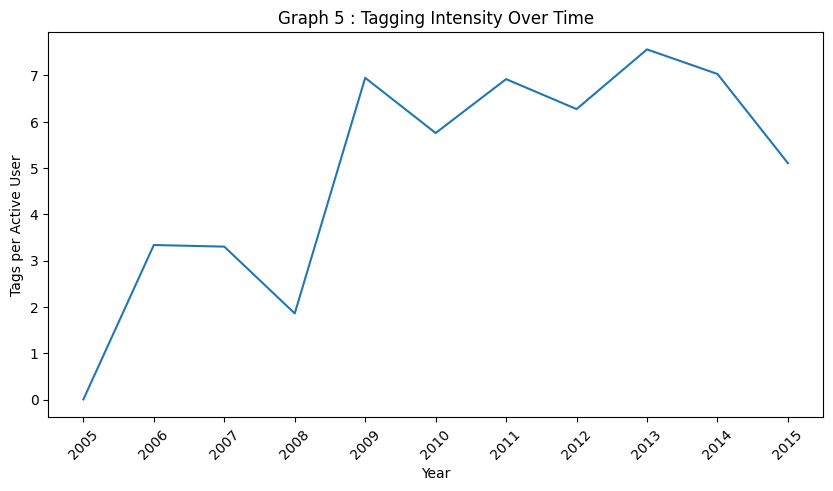

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(tags_user["year"], tags_user["tags_per_user"])
plt.xlabel("Year")
plt.ylabel("Tags per Active User")
plt.title("Graph 5 : Tagging Intensity Over Time")
plt.xticks(tags_user["year"].unique(), rotation=45)
plt.show()


**Tagging intensity per user increases over time, indicating growing user comfort with tagging rather than growth driven purely by user count.**